# K-Means Clustering

In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
df=pd.read_csv("Kmeans.csv")
df.head()

,Ad,Yas,Gelir
0,Ismail,28,5900
1,Kaan,42,15100
2,Ozben,27,5750
3,Galip,39,15400
4,Batuhan,41,15900


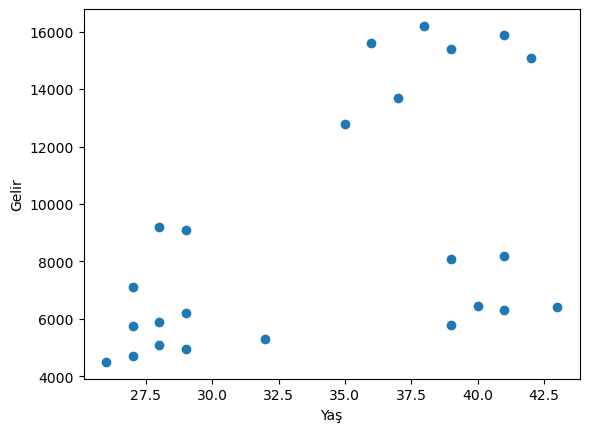

In [4]:
plt.scatter(df.Yas,df['Gelir'])
plt.xlabel('Yaş')
plt.ylabel('Gelir')
plt.show()

Normalize etmek zorundayız 

In [5]:
scaler=MinMaxScaler()

scaler.fit(df[['Gelir']])
df['Gelir']=scaler.transform(df[['Gelir']])

scaler.fit(df[['Yas']])
df['Yas']=scaler.transform(df[['Yas']])

In [6]:
df.head()

,Ad,Yas,Gelir
0,Ismail,0.117647,0.119658
1,Kaan,0.941176,0.905983
2,Ozben,0.058824,0.106838
3,Galip,0.764706,0.931624
4,Batuhan,0.882353,0.974359


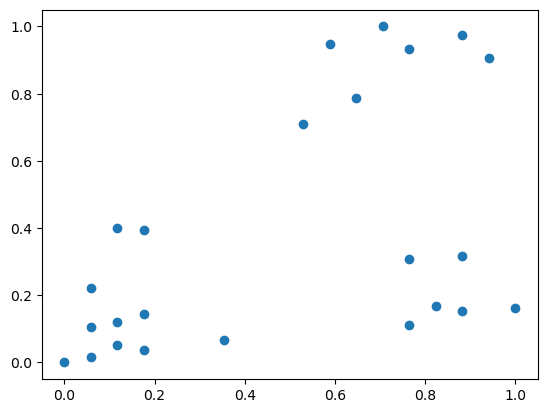

In [7]:
plt.scatter(df.Yas,df['Gelir'])
plt.show()

In [8]:
#K = 3 İçin K-Means oluşturalım
kmeans_modelim=KMeans(n_clusters=3)
y_predicted=kmeans_modelim.fit_predict(df[['Yas','Gelir']])
y_predicted

C:\Users\casper\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\casper\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2,
       2, 1])

In [9]:
df['cluster']=y_predicted
df.head()

,Ad,Yas,Gelir,cluster
0,Ismail,0.117647,0.119658,1
1,Kaan,0.941176,0.905983,0
2,Ozben,0.058824,0.106838,1
3,Galip,0.764706,0.931624,0
4,Batuhan,0.882353,0.974359,0


In [11]:
#Centroidleri görelim
kmeans_modelim.cluster_centers_


array([[0.72268908, 0.89377289],
       [0.12834225, 0.14219114],
       [0.85294118, 0.20299145]])

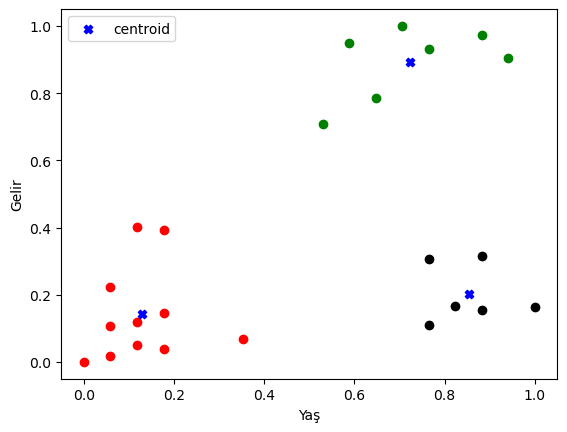

In [13]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.xlabel('Yaş')
plt.ylabel('Gelir')
plt.scatter(df1.Yas,df1['Gelir'],color='green')
plt.scatter(df2.Yas,df2['Gelir'],color='red')
plt.scatter(df3.Yas,df3['Gelir'],color='black')

plt.scatter(kmeans_modelim.cluster_centers_[:,0],kmeans_modelim.cluster_centers_[:,1],color='blue',marker='X',label='centroid')
plt.legend()
plt.show()

In [14]:
#kimlerin hangi grupta olduğunu görüntleyelim
df.sort_values('cluster')[['Ad','cluster']]

,Ad,cluster
1,Kaan,0
3,Galip,0
4,Batuhan,0
6,Ali,0
7,Bartu,0
8,Ayse,0
10,Durmus,0
0,Ismail,1
20,Melih,1
15,Rauf,1


# K değerini belirlemek Elbow Yöntemi

In [17]:
k_range=range(1,20)
list_dist=[]

for k in k_range:
    kmeans_modelim=KMeans(n_clusters=k)
    kmeans_modelim.fit(df[['Yas','Gelir']])
    list_dist.append(kmeans_modelim.inertia_)
    

C:\Users\casper\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\casper\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\casper\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\casper\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there

C:\Users\casper\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\casper\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\casper\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\casper\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to '

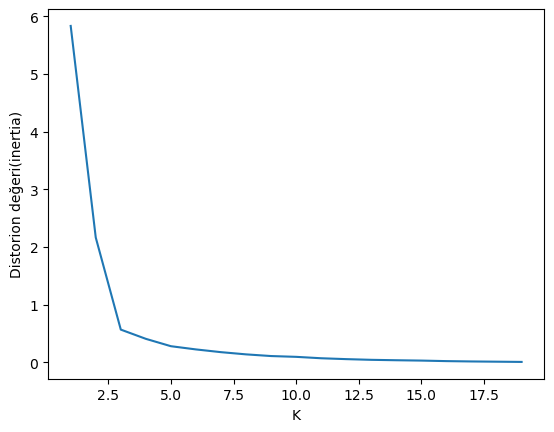

In [18]:
plt.xlabel('K')
plt.ylabel('Distorion değeri(inertia)')
plt.plot(k_range,list_dist)
plt.show()

 en iyi k değeri 3 

In [20]:
df.head()

,Ad,Yas,Gelir,cluster
0,Ismail,0.117647,0.119658,1
1,Kaan,0.941176,0.905983,0
2,Ozben,0.058824,0.106838,1
3,Galip,0.764706,0.931624,0
4,Batuhan,0.882353,0.974359,0
